## Environment

In [1]:
import numpy as np                                          # To perform numerical operations
import pandas as pd                                         # To perform data processing
import matplotlib.pyplot as plt                             # To visualize the data
import seaborn as sns                                       # To visualize the data 
from sklearn.model_selection import train_test_split        # To seperate features and label
from sklearn import metrics                                 # To perform model evaluation

In [2]:
from xgboost import XGBRegressor                           # Model

## Data Collection and Preprocessing

In [3]:
calories = pd.read_csv('calories.csv')

In [4]:
# Printing first 5 rows of the datframe

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
excersize_data = pd.read_csv('exercise.csv')

In [6]:
# Printing first 5 rows of the excersize dataframe

excersize_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# Combining the two dataframes

calories_data = pd.concat([excersize_data, calories['Calories']], axis=1)

In [8]:
# Printing first 5 rows of the new dataframe

calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [9]:
# Getting the shape of the dataframe

calories_data.shape

(15000, 9)

In [10]:
# Getting information of the dataframe

calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
# Checking any null values are present in the dataframe

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Data Analysis

In [12]:
# Getting some statistical measures of the dataframe

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

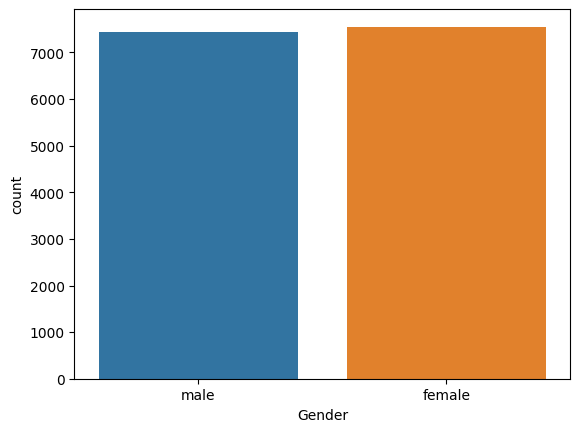

In [14]:
# Plotting the gender column as countplot

sns.countplot(x='Gender', data=calories_data)

C:\Users\sandi\AppData\Local\Temp\ipykernel_23164\635559236.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

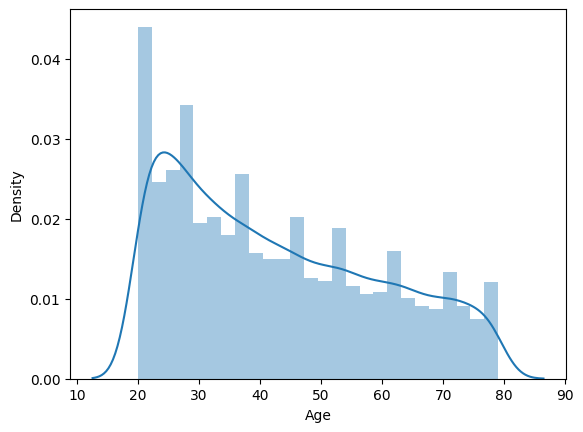

In [15]:
# finding the distribution of "Age" column

sns.distplot(calories_data['Age'])

C:\Users\sandi\AppData\Local\Temp\ipykernel_23164\3479041385.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Height'])


<Axes: xlabel='Height', ylabel='Density'>

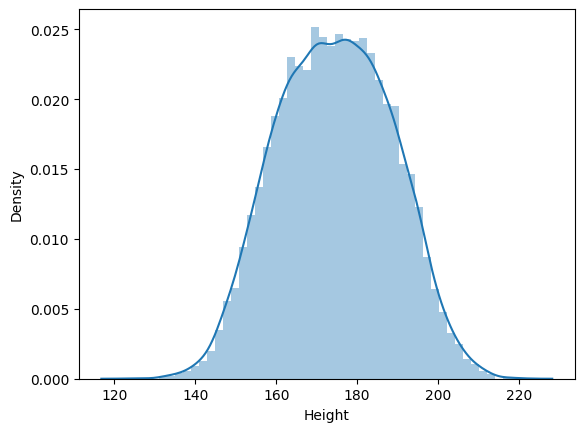

In [16]:
# visualize the distribustion of the heaight column

sns.distplot(calories_data['Height'])

C:\Users\sandi\AppData\Local\Temp\ipykernel_23164\3751027552.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

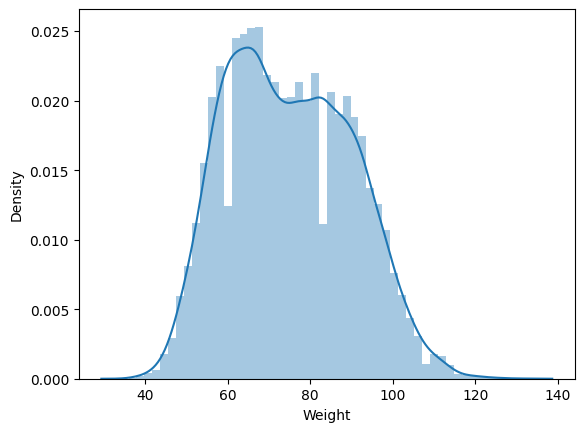

In [17]:
# Visualize the distribution of weight column

sns.distplot(calories_data['Weight'])



- Finding the Correlation in the dataset

  - Positive Correlation
  - Negative Correlation



In [18]:
correlation = calories_data.corr()

C:\Users\sandi\AppData\Local\Temp\ipykernel_23164\669282712.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<Axes: >

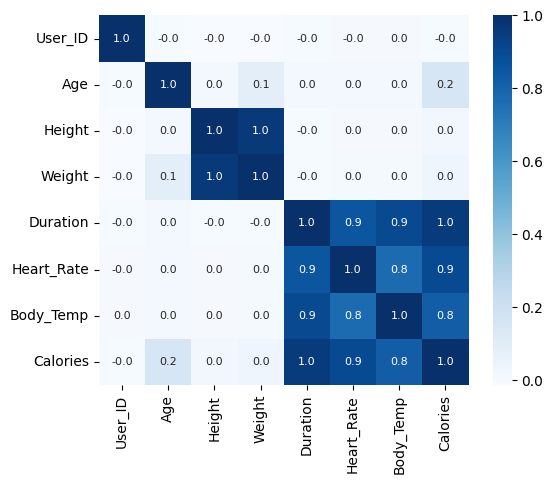

In [20]:
# Visualize correlation using heatmap

sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [21]:
# Converting categorical feature into numerical

calories_data.replace({'Gender': {'male': 0, 'female': 1}}, inplace=True)

In [22]:
# Printing sample dataframe

calories_data.sample(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
10618,12804723,0,65,181.0,80.0,25.0,109.0,40.8,203.0
7674,16306198,0,61,194.0,91.0,26.0,102.0,41.3,185.0
6810,11019387,1,27,168.0,64.0,27.0,110.0,40.8,175.0


## Train-Test Split

In [23]:
X = calories_data.drop(['User_ID','Calories'], axis=1)
Y = calories_data['Calories']

In [24]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [25]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [27]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(11250, 7) (3750, 7) (11250,) (3750,)


## Model Training

#### XGBoost Regressor

In [28]:
model = XGBRegressor()

In [29]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Model Evaluation

In [32]:
# On training data

train_pred = model.predict(X_train)
print(train_pred)

[184.70169  170.35895   20.179379 ...  40.745487  57.603165  57.13118 ]


#### Mean Absolute Error

In [33]:
mae = metrics.mean_absolute_error(Y_train, train_pred)
print(f'Mean Absolute Error = {mae}')

Mean Absolute Error = 0.9559711305167939


In [30]:
# On test data

test_pred = model.predict(X_test)
print(test_pred)

[174.62027   192.48074    51.699715  ...   4.2926226 100.092636
 177.16672  ]


#### Mean Absoluate Error

In [31]:
mae = metrics.mean_absolute_error(Y_test, test_pred)
print(f'Mean Absolute Error = {mae}')

Mean Absolute Error = 1.524083084543546


## To Save Model

In [34]:
import pickle

In [35]:
file_name = 'XGBoost_Regressor.pkl'
with open(file_name,'wb') as file:
    pickle.dump(model, file)